In [1]:
#Kết nối drive
from google.colab import drive
drive.mount('/content/drive')

#THêm thư viện
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math

Mounted at /content/drive


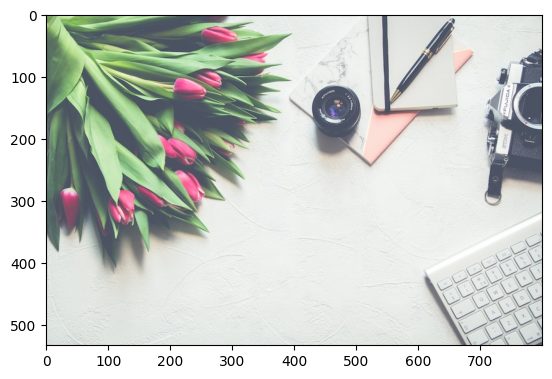

In [2]:
#Đọc ảnh
img_ORG = plt.imread('/content/drive/MyDrive/XuLyAnh/TH1/TH1/Photo00001.jpg')
plt.imshow(img_ORG)

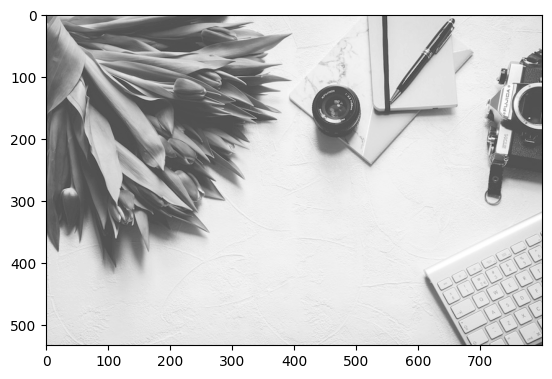

In [5]:
#Chuyển đổi ảnh màu sang ảnh mức xám
anhxam = cv2.cvtColor(img_ORG, cv2.COLOR_BGR2GRAY)
plt.imshow(anhxam, cmap='gray')


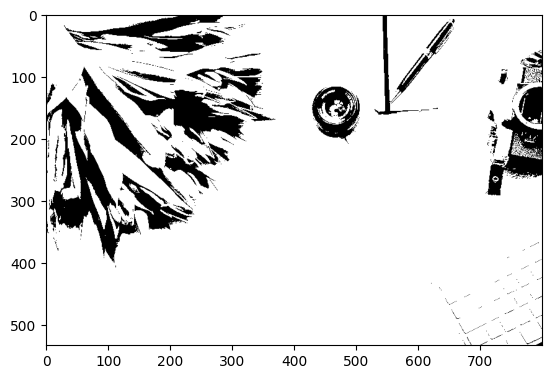

In [30]:

# --- Bài 1 Phân ngưỡng ảnh
def PhanNguong(img,c):
  width, height = img.shape[:2] #Lấy chiều dài và chiều rộng của ảnh

  anhKQ = img.astype('float32')
  anhKQ = (anhKQ >= c)
  return anhKQ.astype('uint8')

plt.imshow(PhanNguong(anhxam,100),cmap='gray')


168.6005976364953


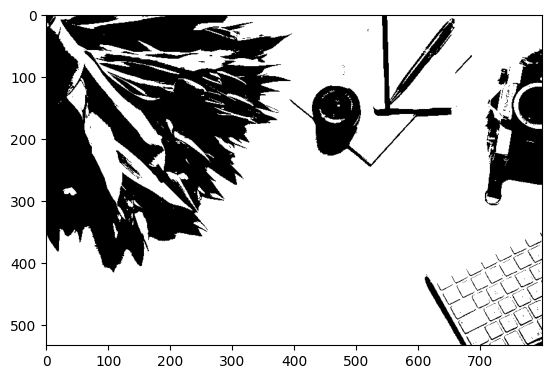

In [71]:

# --Xác định ngưỡng


def XacDinhNguong(img,T,detaT):
  #Bước 1:
  Tnew = 0
  m1 = img.astype('float32')
  m2 = img.astype('float32')
  i = 0
  while True:
    #Bước 2
    #print(f'----- Lặp lần{i}:')
    m1 = (img <= T)
    m2 = (img > T)
    DoSangTrungBinhM1 = np.mean(img[m1])
    DoSangTrungBinhM2 = np.mean(img[m2])
    #print(f'Do sang trung binh M1: {DoSangTrungBinhM1}')
    #print(f'Do sang trung binh M2: {DoSangTrungBinhM2}')

    #Bước 3
    Tnew = (DoSangTrungBinhM1 + DoSangTrungBinhM2)*0.5
    #print(f"Tmoi = {Tnew}")
    #print(f"Chuan bi dung: {abs(Tnew - T)}")

    #Bước 4:Điều kiện dừng
    if abs(Tnew - T) <= detaT:
      #print(f"Ket qua T: {T}")
      return T
    else:
      T = Tnew
    i+=1
print(XacDinhNguong(anhxam,50,1))

plt.imshow(PhanNguong(anhxam,XacDinhNguong(anhxam,50,1)), cmap='gray')

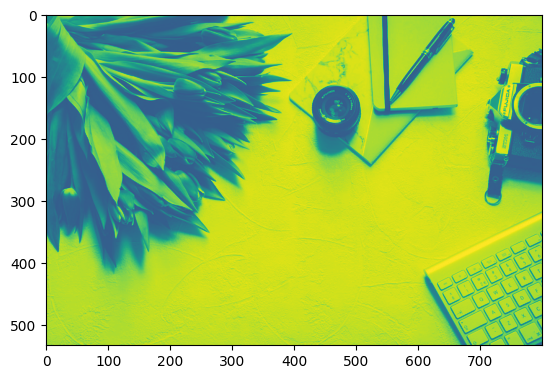

In [72]:
# --- Phân ngưỡng cục bộ
from skimage.filters import threshold_local
anh_ket_qua = threshold_local(anhxam ,block_size = 3 ,offset = 30)
plt.imshow(anh_ket_qua)

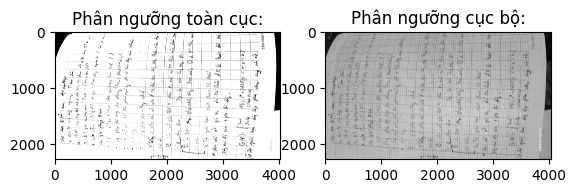

In [73]:
#Lấy ảnh
taiLieu = plt.imread('/content/drive/MyDrive/XuLyAnh/TH1/TH1/20231031_083850.jpg')

anhxamTaiLieu = cv2.cvtColor(taiLieu, cv2.COLOR_BGR2GRAY)

plt.subplots(nrows = 1, ncols = 2)

#Phân ngưỡng toàn cục
plt.subplot(1,2,1)
plt.title("Phân ngưỡng toàn cục:")
plt.imshow(PhanNguong(anhxamTaiLieu,XacDinhNguong(anhxamTaiLieu,50,1)),cmap = 'gray')

#Phân ngưỡng  cục bộ
anh_ketQua2 = threshold_local(anhxamTaiLieu ,block_size = 3 ,offset = 30)
plt.subplot(1,2,2)
plt.title("Phân ngưỡng cục bộ:")
plt.imshow(anh_ketQua2,cmap = 'gray')